# Trabalho 01 de Métodos Quantitativos
## Bibliotecas

In [1]:
import numpy as np
import pandas as pd

## Primeira visualização dos dados
#### Base do IMDB de ranking de filmes

In [2]:
import matplotlib.pyplot as plt
df = pd.read_csv('/home/allan/Downloads/metodosquantitativos/data.csv', delimiter='\t', low_memory=False)
print(df.head())
df.describe()

      tconst  averageRating  numVotes
0  tt0000001            5.6      1538
1  tt0000002            6.1       186
2  tt0000003            6.5      1198
3  tt0000004            6.2       114
4  tt0000005            6.1      1909


,averageRating,numVotes
count,978337.000000,9.783370e+05
mean,6.885982,9.590946e+02
std,1.401628,1.563819e+04
min,1.000000,5.000000e+00
25%,6.100000,9.000000e+00
50%,7.100000,2.000000e+01
75%,7.900000,7.600000e+01
max,10.000000,2.139781e+06


### Trabalhando os dados
#### 1. Pegar somente o campo das notas e as ordenar
#### 2. Criar variaveis com dados em formato discretas (Xd) e contínuo  (Xc)
#### 3. Pegar a quantidade total de atributos (totalAtributos)

In [3]:
Xc = df['averageRating'].sort_values(ascending=True) 
Xd = Xc.astype(int)
totalAtributos = len(Xc)

## CDF


### 1. Discreto
   #### 1.1 Calculando

In [4]:
"""1. Discreto"""
"""1.1 Calculando"""
"""Pegando a quantidade de ocorrências e calculando a probabilidade"""

print("DISCRETO")
ocorrenciasD = dict()
totalOcorrenciaD = 0
#calculando quantidade de ocorrências
for i in Xd:
    try:
        ocorrenciasD[i] += 1
    except KeyError:
        ocorrenciasD[i] = 1
        totalOcorrenciaD = totalOcorrenciaD + 1

print("Total de ocorrências: ", totalOcorrenciaD)
print("Ocorrências: ", ocorrenciasD)

#calculando a probabilidade
probabilidadeD = []
eixoXD = []
for itemD, totalOcorrenciaIndividualD in ocorrenciasD.items():
    probabilidadeD.append(totalOcorrenciaIndividualD/totalAtributos)
    eixoXD.append(itemD)
print("\nProbabilidade:", probabilidadeD)

#Calculando eixo X da CDF
ValorEixoXD = []
ValorEixoXD.append(probabilidadeD[0])

for i in range(itemD):
    if i != 0:
        ValorEixoXD.append(probabilidadeD[i]+ValorEixoXD[i-1])
        

print("\nEixo X:", eixoXD, ValorEixoXD)


DISCRETO
Total de ocorrências:  10
Ocorrências:  {1: 4034, 2: 9294, 3: 22694, 4: 53962, 5: 122091, 6: 236913, 7: 308646, 8: 182690, 9: 34949, 10: 3064}

Probabilidade: [0.004123323558242201, 0.009499794038250624, 0.0231965059074736, 0.055156863125896294, 0.12479442155412705, 0.24215888799053906, 0.3154802486259847, 0.18673524562599594, 0.03572286441175178, 0.0031318451617387464]

Eixo X: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [0.004123323558242201, 0.013623117596492824, 0.03681962350396642, 0.09197648662986271, 0.21677090818398975, 0.4589297961745288, 0.7744100448005136, 0.9611452904265095, 0.9968681548382613, 1.0]


   ##### 1.2 Plotando

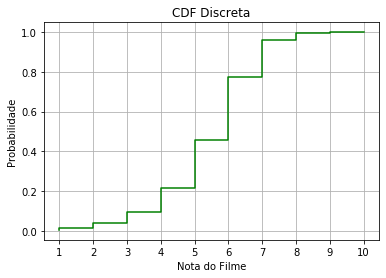

In [5]:
"""1.2 Plotando"""
plt.xlabel('Nota do Filme')
plt.ylabel('Probabilidade')
plt.title('CDF Discreta')
plt.grid(True)
plt.xticks(eixoXD)
plt.step(eixoXD, ValorEixoXD, color='g')
plt.show()

### 2. Continuo
   #### 2.1 Calculando

In [6]:
"""2. Continuo"""
"""2.1 Calculando"""
"""Pegando a quantidade de ocorrências e calculando a probabilidade"""

print("Continuo")
ocorrenciasC = dict()
totalOcorrenciaC = 0
#calculando quantidade de ocorrências
for j in Xc:
    try:
        ocorrenciasC[j] +=1
    except KeyError:
        ocorrenciasC[j] = 1 
        totalOcorrenciaC = totalOcorrenciaC + 1
    
print("Total de Ocorrências: ", totalOcorrenciaC)
print("Ocorrências: ", ocorrenciasC)

#calculando a probabilidade
probabilidadeC = []
eixoXC = []
for itemC, totalOcorrenciaIndividualC in ocorrenciasC.items():
    probabilidadeC.append(totalOcorrenciaIndividualC/totalAtributos)
    eixoXC.append(itemC)
print("\nProbabilidade:", probabilidadeC)

#Calculando eixo X da CDF
ValorEixoXC = []
ValorEixoXC.append(probabilidadeC[0])

for i in range(totalOcorrenciaC):
    if i != 0:
        ValorEixoXC.append(probabilidadeC[i]+ValorEixoXC[i-1])
        

print("\nEixo X:", eixoXC, ValorEixoXC)


Continuo
Total de Ocorrências:  91
Ocorrências:  {1.0: 968, 1.1: 237, 1.2: 251, 1.3: 240, 1.4: 287, 1.5: 288, 1.6: 420, 1.7: 395, 1.8: 500, 1.9: 448, 2.0: 675, 2.1: 643, 2.2: 757, 2.3: 762, 2.4: 894, 2.5: 897, 2.6: 1010, 2.7: 1014, 2.8: 1482, 2.9: 1160, 3.0: 1608, 3.1: 1443, 3.2: 1980, 3.3: 1769, 3.4: 2295, 3.5: 2101, 3.6: 2830, 3.7: 2529, 3.8: 3436, 3.9: 2703, 4.0: 4103, 4.1: 3424, 4.2: 4735, 4.3: 4168, 4.4: 5240, 4.5: 4989, 4.6: 6654, 4.7: 6076, 4.8: 8006, 4.9: 6567, 5.0: 9869, 5.1: 8163, 5.2: 11095, 5.3: 10067, 5.4: 12016, 5.5: 11354, 5.6: 14029, 5.7: 13278, 5.8: 17487, 5.9: 14733, 6.0: 20618, 6.1: 17474, 6.2: 23644, 6.3: 20506, 6.4: 24398, 6.5: 22648, 6.6: 26624, 6.7: 24786, 6.8: 30843, 6.9: 25372, 7.0: 33339, 7.1: 28035, 7.2: 34881, 7.3: 29370, 7.4: 32542, 7.5: 29166, 7.6: 32902, 7.7: 29079, 7.8: 33380, 7.9: 25952, 8.0: 30601, 8.1: 24364, 8.2: 26630, 8.3: 19490, 8.4: 19012, 8.5: 15556, 8.6: 15165, 8.7: 12238, 8.8: 11880, 8.9: 7754, 9.0: 8625, 9.1: 5132, 9.2: 5852, 9.3: 3413, 9.4: 

   ##### 2.2 Plotando

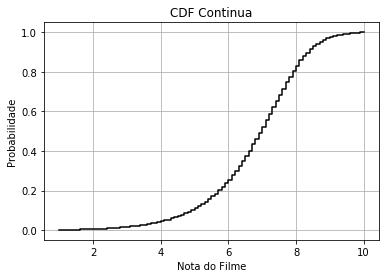

In [7]:
"""2.2 Plotando"""
plt.xlabel('Nota do Filme')
plt.ylabel('Probabilidade')
plt.title('CDF Continua')
plt.grid(True)
plt.step(eixoXC, ValorEixoXC, color='k')
plt.show()

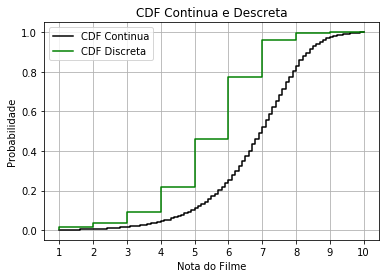

In [8]:
"""3 Plotando"""
plt.xlabel('Nota do Filme')
plt.ylabel('Probabilidade')
plt.title('CDF Continua e Descreta')
plt.grid(True)
plt.step(eixoXC, ValorEixoXC, color='k',label='CDF Continua')
plt.xticks(eixoXD)
plt.step(eixoXD, ValorEixoXD, color='g',label='CDF Discreta')
plt.legend(loc='best')
plt.show()

## PMF
### Calculando e Reaproveitando os cálculos da CDF


PMF por nota
   Nota       PMF
0     1  0.004123
1     2  0.009500
2     3  0.023197
3     4  0.055157
4     5  0.124794
5     6  0.242159
6     7  0.315480
7     8  0.186735
8     9  0.035723
9    10  0.003132


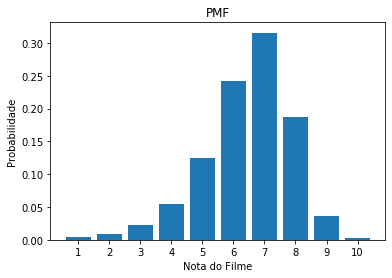

In [9]:
# Criando tabela de relação nota PMF
data = {'Nota':eixoXD, 'PMF':probabilidadeD} 
pmf = pd.DataFrame(data) 

print("PMF por nota")
print(pmf)

"""Plotando"""
plt.xlabel('Nota do Filme')
plt.ylabel('Probabilidade')
plt.title('PMF')
plt.xticks(eixoXD)
plt.bar(eixoXD, probabilidadeD,label='PMF')
plt.show()

## PDF
### Calculando e Reaproveitando os cálculos da CDF


PDF por nota
   Nota       PDF
0   1.0  0.000989
1   1.1  0.000242
2   1.2  0.000257
3   1.3  0.000245
4   1.4  0.000293


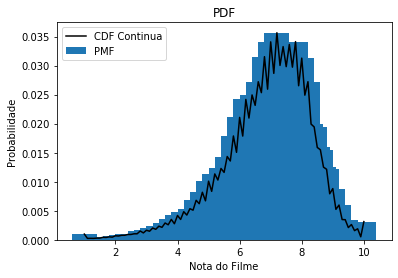

In [10]:
# Criando tabela de relação nota PMF
data = {'Nota':eixoXC, 'PDF':probabilidadeC} 
pmf = pd.DataFrame(data) 

print("PDF por nota")
print(pmf.head())

"""Plotando"""
plt.xlabel('Nota do Filme')
plt.ylabel('Probabilidade')
plt.title('PDF')
plt.bar(eixoXC, probabilidadeC, label='PMF')
plt.plot(eixoXC, probabilidadeC, color='k',label='CDF Continua')
plt.legend(loc='best')
plt.show()

## Parte 2
### Plotagem de gráficos usando bibliotecas prontas

### CDF discreta

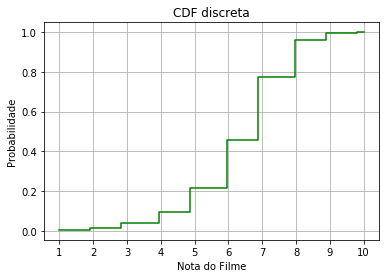

In [11]:
"""CDF discreta"""
import statsmodels.api as sm 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
sample = Xd
ecdf=ECDF(sample)
x = np.linspace(min(sample), max(sample))
y = ecdf(x)
plt.xlabel('Nota do Filme')
plt.ylabel('Probabilidade')
plt.title('CDF discreta')
plt.xticks(eixoXD)
plt.step(x,y,color='g')
plt.grid(True)
plt.show()

## CDF Contínua

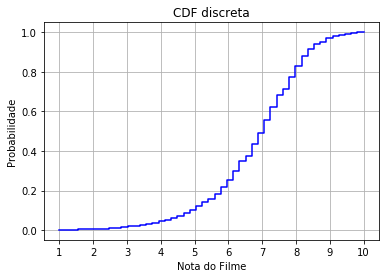

In [12]:
import statsmodels.api as sm 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
sample = Xc
ecdf=ECDF(sample)
# ecdf = sm.distributions.ECDF(sample)
x1 = np.linspace(min(sample), max(sample))
y1 = ecdf(x)
plt.xlabel('Nota do Filme')
plt.ylabel('Probabilidade')
plt.title('CDF discreta')
plt.xticks(eixoXD)
plt.step(x1,y1,color='b')
plt.grid(True)
plt.show()

## Comparação entre discreto e contínuo

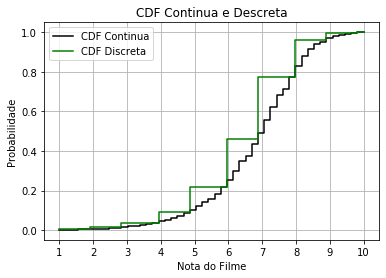

In [13]:
plt.xlabel('Nota do Filme')
plt.ylabel('Probabilidade')
plt.title('CDF Continua e Descreta')
plt.grid(True)
plt.step(x1, y1, color='k',label='CDF Continua')
plt.xticks(eixoXD)
plt.step(x, y, color='g',label='CDF Discreta')
plt.legend(loc='best')
plt.show()

### PMF

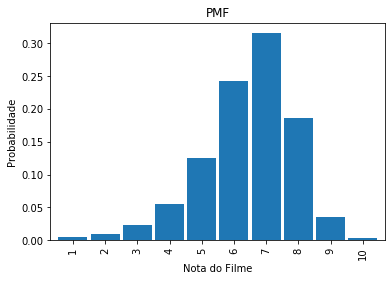

In [14]:
"""PMF"""
sample=Xd
pmf = sample.value_counts().sort_index() / len(sample)
plt.xlabel('Nota do Filme')
plt.ylabel('Probabilidade')
plt.title('PMF')
plt.xticks(eixoXD,rotation=90)
pmf.plot(kind="bar",width=0.9)

### PDF

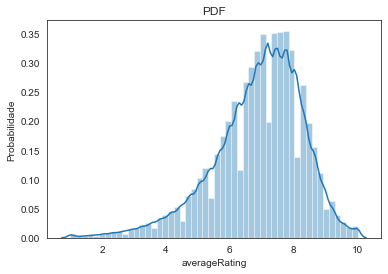

In [16]:
import seaborn as sns
x = Xc
sns.set_style('white')
plt.xlabel('Nota do Filme')
plt.ylabel('Probabilidade')
plt.title('PDF')
sns.distplot(x)